In [1]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [7]:
df.duplicated().sum()

122

In [9]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,supertech araville,sector 79,0.71,5522.0,1286.0,Built Up area: 1295 (120.31 sq.m.),2,2,0,not available,9.0,NaN,Under Construction,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]",[],NaN


## 1. areaWithType


In [12]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1878,1.28,1215.0,Super Built up area 1215(112.88 sq.m.)
1769,0.50,450.0,Plot area 450(41.81 sq.m.)
3026,8.31,3438.0,Plot area 382(319.4 sq.m.)
1509,1.36,1578.0,Super Built up area 1578(146.6 sq.m.)Carpet area: 1039 sq.ft. (96.53 sq.m.)
334,6.00,6565.0,Carpet area: 6565 (609.91 sq.m.)


In [14]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [16]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [18]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [20]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [22]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1276,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
1468,2.10,flat,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),2000.0,1600.0,1500.0
818,0.95,flat,1307.0,Carpet area: 1307 (121.42 sq.m.),NaN,NaN,1307.0
1538,0.56,flat,822.0,Carpet area: 822 (76.37 sq.m.),NaN,NaN,822.0
651,8.00,house,4500.0,Built Up area: 500 (418.06 sq.m.),NaN,500.0,NaN


In [24]:
df.duplicated().sum()

122

In [30]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [26]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
6,1.20,flat,1678.0,Super Built up area 1671(155.24 sq.m.)Built Up area: 1660 sq.ft. (154.22 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),1671.0,1660.00,1650.00
27,2.05,flat,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),2812.0,2500.00,2250.00
30,2.38,flat,2070.0,Super Built up area 2070(192.31 sq.m.)Built Up area: 2061 sq.ft. (191.47 sq.m.)Carpet area: 1750 sq.ft. (162.58 sq.m.),2070.0,2061.00,1750.00
34,1.88,flat,2727.0,Super Built up area 2727(253.35 sq.m.)Built Up area: 2726 sq.ft. (253.25 sq.m.)Carpet area: 2725 sq.ft. (253.16 sq.m.),2727.0,2726.00,2725.00
45,1.10,flat,1150.0,Super Built up area 1640(152.36 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1150 sq.ft. (106.84 sq.m.),1640.0,1600.00,1150.00
48,0.39,flat,950.0,Super Built up area 950(88.26 sq.m.)Built Up area: 720 sq.ft. (66.89 sq.m.)Carpet area: 610 sq.ft. (56.67 sq.m.),950.0,720.00,610.00
72,1.05,flat,1230.0,Super Built up area 1230(114.27 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),1230.0,1200.00,1000.00
88,1.25,flat,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),1900.0,1305.00,1173.00
96,3.00,flat,2600.0,Super Built up area 2802(260.31 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),2802.0,2600.00,2200.00
102,1.70,flat,1745.0,Super Built up area 1745(162.12 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.),1745.0,1550.00,1250.00


In [28]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape
#means these are the only column in which we have all the values of different type of area

(534, 7)

In [32]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,0.45,house,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),NaN,NaN,1500.0
3,7.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
7,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
11,5.60,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,NaN,NaN
17,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,NaN,NaN


In [34]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [36]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [38]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,7.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
7,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
11,5.60,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,NaN,NaN
17,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,NaN,NaN
18,5.51,house,3243.0,Plot area 361(301.84 sq.m.),NaN,NaN,NaN


In [40]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [42]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [44]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [46]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,7.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
7,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
11,5.60,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
17,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
18,5.51,house,3243.0,Plot area 361(301.84 sq.m.),NaN,361.00,NaN
20,5.65,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
22,1.95,house,920.0,Plot area 920(85.47 sq.m.),NaN,920.00,NaN
26,0.92,house,603.0,Plot area 67(56.02 sq.m.),NaN,67.00,NaN
31,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,7000.00,NaN
32,9.01,house,5608.0,Plot area 521,NaN,521.00,NaN


In [48]:
# update the original dataframe
df.update(all_nan_df)

In [50]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,supertech araville,sector 79,0.71,5522.0,1286.0,Built Up area: 1295 (120.31 sq.m.),2,2,0,not available,9.0,NaN,Under Construction,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]",[],NaN,NaN,1295.0,NaN
1,flat,pioneer araya,sector 62,9.95,20995.0,4739.0,Super Built up area 4739(440.27 sq.m.)Carpet area: 3219 sq.ft. (299.05 sq.m.),4,6,3,"pooja room,servant room",12.0,South-East,1 to 5 Year Old,"['Paras Trinity Shopping Mall', 'Golf Course Extension Road', 'Heritage Xperiential Learning School', 'IILM University, Gurugram', 'Swastik Multispeciality Hospital', 'Indira Gandhi International Airport', 'AIPL Business Co Working Space', 'Lemon Tree Hotel Sector 60', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club', 'SCC Drive-In Cinema']","['6 Fan', '10 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4739.0,NaN,3219.0
2,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),4,4,2,not available,4.0,North,5 to 10 Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'Prateek Nursing Home And Polyclinic', 'Sneh Hospital Gurgaon', 'R K Hospital Gurgaon', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Sarvodya Hospital', 'Dr. Sindhu Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Ashok Jain', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Taneja Hospital', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Geeta Nursing Home Gurgaon', 'Sparsh Hospital Gurgaon', 'GH Gurgaon', 'Ravi Clinic and Health Care Centre', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Dr. Sarvejeet Singh', 'Bindal Clinic', 'Dev Man Kathuria Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Swastik Maternity and Medical Centre', 'Kidney Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['4 Wardrobe', '4 Bed', '7 Fan', '1 Fridge', '1 Exhaust Fan', '2 Geyser', '40 Light', '1 Modular Kitchen', '1 TV', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",['Water Storage'],NaN,NaN,1500.0
3,house,independent,sector 82,7.00,21605.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,"pooja room,study room,servant room",1.0,North-East,1 to 5 Year Old,"['Orris Community Center', 'Petrol Pump Indian Oil', 'Essar Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Indian Oil', 'HP Petrol Pump', 'Vijay Petrol Pump', 'KFC', 'Pizza Hut', 'Rao Dhaba', ""McDonald's""]","['13 Fan', '1 Exhaust Fan', '6 Geyser', '38 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains',

## 2.additionalRoom


In [55]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [57]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [59]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2174,"others,servant room",0,1,0,0,1
3789,servant room,0,1,0,0,0
3702,study room,1,0,0,0,0
594,not available,0,0,0,0,0
2977,others,0,0,0,0,1


In [62]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,supertech araville,sector 79,0.71,5522.0,1286.0,Built Up area: 1295 (120.31 sq.m.),2,2,0,not available,9.0,NaN,Under Construction,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]",[],NaN,NaN,1295.0,NaN,0,0,0,0,0
1,flat,pioneer araya,sector 62,9.95,20995.0,4739.0,Super Built up area 4739(440.27 sq.m.)Carpet area: 3219 sq.ft. (299.05 sq.m.),4,6,3,"pooja room,servant room",12.0,South-East,1 to 5 Year Old,"['Paras Trinity Shopping Mall', 'Golf Course Extension Road', 'Heritage Xperiential Learning School', 'IILM University, Gurugram', 'Swastik Multispeciality Hospital', 'Indira Gandhi International Airport', 'AIPL Business Co Working Space', 'Lemon Tree Hotel Sector 60', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club', 'SCC Drive-In Cinema']","['6 Fan', '10 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4739.0,NaN,3219.0,0,1,0,1,0
2,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),4,4,2,not available,4.0,North,5 to 10 Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'Prateek Nursing Home And Polyclinic', 'Sneh Hospital Gurgaon', 'R K Hospital Gurgaon', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Sarvodya Hospital', 'Dr. Sindhu Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Ashok Jain', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Taneja Hospital', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Geeta Nursing Home Gurgaon', 'Sparsh Hospital Gurgaon', 'GH Gurgaon', 'Ravi Clinic and Health Care Centre', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Dr. Sarvejeet Singh', 'Bindal Clinic', 'Dev Man Kathuria Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Swastik Maternity and Medical Centre', 'Kidney Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['4 Wardrobe', '4 Bed', '7 Fan', '1 Fridge', '1 Exhaust Fan', '2 Geyser', '40 Light', '1 Modular Kitchen', '1 TV', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",['Water Storage'],NaN,NaN,1500.0,0,0,0,0,0
3,house,independent,sector 82,7.00,21605.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,"pooja room,study room,servant room",1.0,North-East,1 to 5 Year Old,"['Orris Community Center', 'Petrol Pump Indian Oil', 'Essar Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Indian Oil', 'HP Petrol Pump', 'Vijay Petrol Pump', 'KFC', 'Pizza Hut', 'Rao Dhaba', ""McDonald's""]","['13 Fan', '1 Exhaust Fan', '6 Geys

## 3.agePossession


In [64]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
Sep 2023                 4
Jul 2024                 4
By 2025                  4
Aug 2024                 4
Oct 2023                 4
May 2024                 3
Nov 2024                 3
Jan 2025                 3
Feb 2024                 3
Jul 2027                 2
Oct 2025                 2
Sep 2025                 2
Dec 2026                 2
Mar 2025                 2
Aug 2025                 2
Jun 2027                 2
Apr 2026                 2
Jul 2025      

In [66]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [68]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [70]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [72]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,supertech araville,sector 79,0.71,5522.0,1286.0,Built Up area: 1295 (120.31 sq.m.),2,2,0,not available,9.0,NaN,Under Construction,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]",[],NaN,NaN,1295.0,NaN,0,0,0,0,0
1,flat,pioneer araya,sector 62,9.95,20995.0,4739.0,Super Built up area 4739(440.27 sq.m.)Carpet area: 3219 sq.ft. (299.05 sq.m.),4,6,3,"pooja room,servant room",12.0,South-East,Relatively New,"['Paras Trinity Shopping Mall', 'Golf Course Extension Road', 'Heritage Xperiential Learning School', 'IILM University, Gurugram', 'Swastik Multispeciality Hospital', 'Indira Gandhi International Airport', 'AIPL Business Co Working Space', 'Lemon Tree Hotel Sector 60', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club', 'SCC Drive-In Cinema']","['6 Fan', '10 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4739.0,NaN,3219.0,0,1,0,1,0
2,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),4,4,2,not available,4.0,North,Moderately Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'Prateek Nursing Home And Polyclinic', 'Sneh Hospital Gurgaon', 'R K Hospital Gurgaon', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Sarvodya Hospital', 'Dr. Sindhu Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Ashok Jain', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Taneja Hospital', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Geeta Nursing Home Gurgaon', 'Sparsh Hospital Gurgaon', 'GH Gurgaon', 'Ravi Clinic and Health Care Centre', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Dr. Sarvejeet Singh', 'Bindal Clinic', 'Dev Man Kathuria Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Swastik Maternity and Medical Centre', 'Kidney Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['4 Wardrobe', '4 Bed', '7 Fan', '1 Fridge', '1 Exhaust Fan', '2 Geyser', '40 Light', '1 Modular Kitchen', '1 TV', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",['Water Storage'],NaN,NaN,1500.0,0,0,0,0,0
3,house,independent,sector 82,7.00,21605.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,"pooja room,study room,servant room",1.0,North-East,Relatively New,"['Orris Community Center', 'Petrol Pump Indian Oil', 'Essar Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol Pump', 'Indian Oil', 'HP Petrol Pump', 'Vijay Petrol Pump', 'KFC', 'Pizza Hut', 'Rao Dhaba', ""McDonald's""]","['13 Fan', '1 Exhaust Fan', '6 Geyser',

## 4.furnishDetails


In [75]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
122,"['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Geyser', '8 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
626,"['18 Fan', '1 Fridge', '1 Exhaust Fan', '21 Geyser', '18 AC', '18 Chimney', '21 Curtains', '1 Modular Kitchen', '18 TV', '18 Wardrobe', 'No Bed', 'No Dining Table', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
2632,"['5 Wardrobe', '1 Water Purifier', '6 Geyser', '1 Stove', '10 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3097,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"
1191,"['5 Fan', '1 Exhaust Fan', '5 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [77]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [79]:
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rubha\AppData\Local\Temp\ipykernel_26548\323174201.py:6: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [81]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [83]:
furnishings_df.shape

(3803, 19)

In [ ]:
furnishings_df=furnishings_df.drop(columns=['furnishDetails'])

In [89]:
furnishings_df.sample(5)

,Washing Machine,Stove,Bed,Modular Kitchen,Microwave,Curtains,Fridge,Dining Table,Fan,Light,Chimney,Geyser,AC,Sofa,TV,Water Purifier,Exhaust Fan,Wardrobe
1114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0,1,0,1,0,0,6,11,1,0,0,0,0,0,1,4
2142,0,0,0,1,0,0,0,0,0,0,1,0,5,0,0,0,0,0
178,1,0,0,1,1,0,1,0,7,51,1,5,6,0,0,0,1,4
2105,0,1,0,1,0,0,0,0,5,55,1,3,4,0,0,0,1,3


In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [95]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

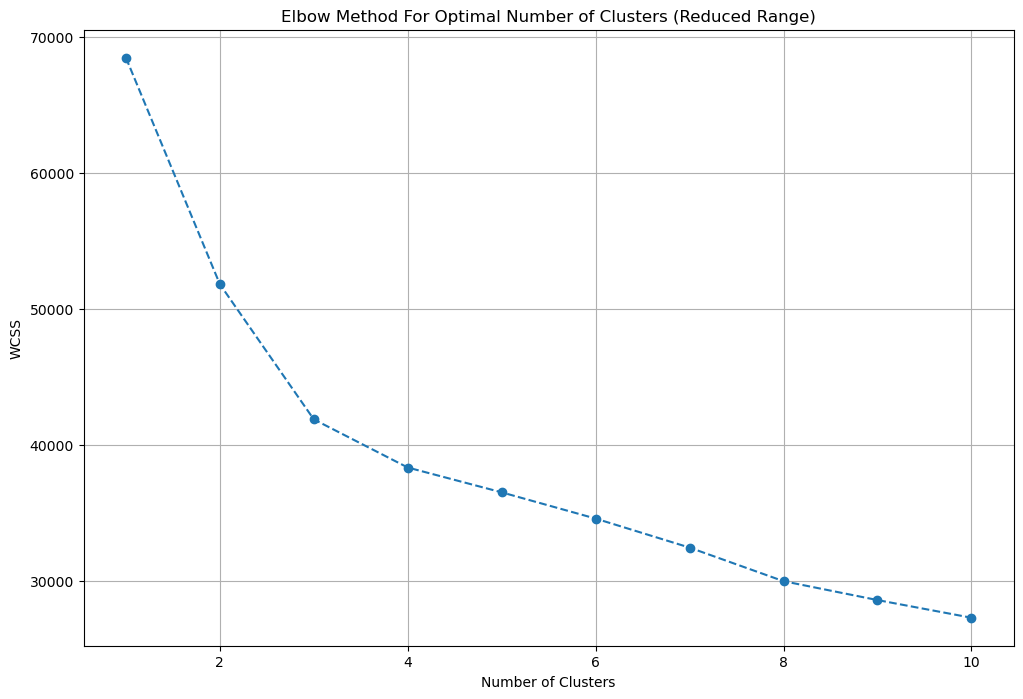

In [97]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [99]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [101]:
df = df.iloc[:,:-18]

In [103]:
df['furnishing_type'] = cluster_assignments

In [112]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3311,NaN,1
845,NaN,1
1891,"['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2903,"['1 Water Purifier', '8 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '1 Light', '6 AC', '1 TV', '1 Modular Kitchen', '1 Chimney', '9 Curtains', '5 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No Bed']",2
2705,NaN,1


## 5.features


In [115]:
df[['society','features']].sample(5)

,society,features
2008,shapoorji pallonji joyville gurugram,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
717,independent,"['High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage']"
3445,independent,NaN
639,independent,NaN
2757,ramprastha the edge towers,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Shopping Centre']"


In [117]:
df['features'].isnull().sum()

635

In [119]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [121]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [123]:
///////////////////////////
temp_df = df[df['features'].isnull()]

In [125]:
temp_df.shape

(635, 26)

In [127]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [129]:
# inserting values in those features where value is null
df.loc[temp_df.index,'features'] = x.values

In [131]:
df['features'].isnull().sum()

481

In [133]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [135]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [137]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3542,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [139]:
features_binary_df.shape

(3803, 130)

In [141]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

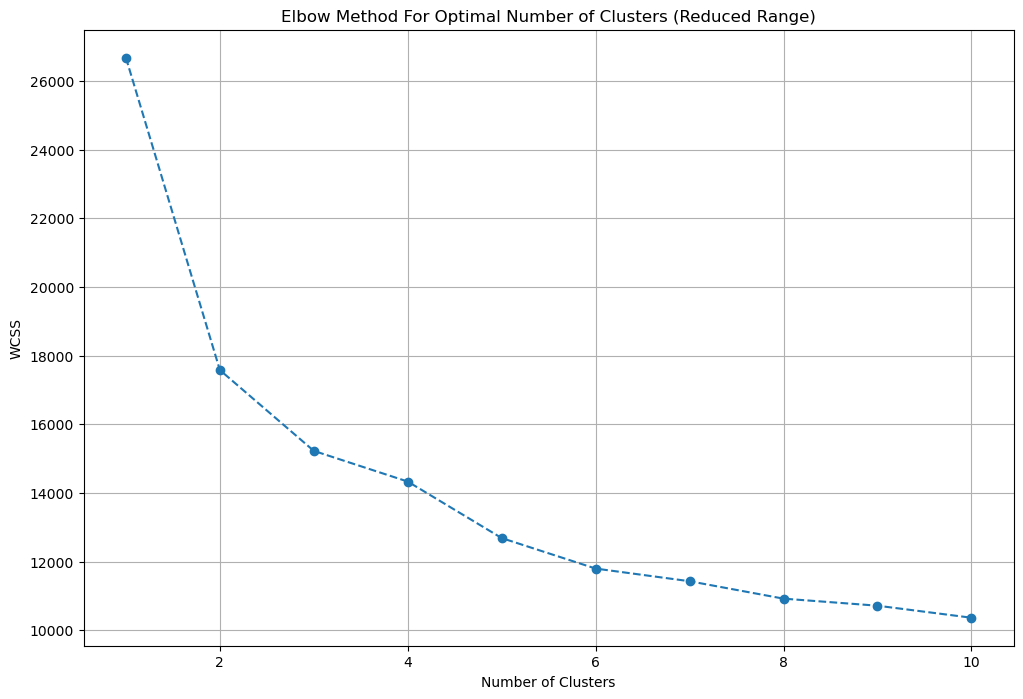

In [143]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [145]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [147]:
df['luxury_score'] = luxury_score

In [149]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,supertech araville,sector 79,0.71,5522.0,1286.0,Built Up area: 1295 (120.31 sq.m.),2,2,0,not available,9.0,NaN,Under Construction,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]",[],NaN,NaN,1295.0,NaN,0,0,0,0,0,1,[],0
1,flat,pioneer araya,sector 62,9.95,20995.0,4739.0,Super Built up area 4739(440.27 sq.m.)Carpet area: 3219 sq.ft. (299.05 sq.m.),4,6,3,"pooja room,servant room",12.0,South-East,Relatively New,"['Paras Trinity Shopping Mall', 'Golf Course Extension Road', 'Heritage Xperiential Learning School', 'IILM University, Gurugram', 'Swastik Multispeciality Hospital', 'Indira Gandhi International Airport', 'AIPL Business Co Working Space', 'Lemon Tree Hotel Sector 60', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club', 'SCC Drive-In Cinema']","['6 Fan', '10 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4739.0,NaN,3219.0,0,1,0,1,0,0,"[Security / Fire Alarm, Power Back-up, Private Garden / Terrace, Intercom Facility, Lift(s), Maintenance Staff, False Ceiling Lighting, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",138
2,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),4,4,2,not available,4.0,North,Moderately Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'Prateek Nursing Home And Polyclinic', 'Sneh Hospital Gurgaon', 'R K Hospital Gurgaon', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Sarvodya Hospital', 'Dr. Sindhu Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Ashok Jain', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Pearl Dental Clinic', 'Taneja Hospital', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Geeta Nursing Home Gurgaon', 'Sparsh Hospital Gurgaon', 'GH Gurgaon', 'Ravi Clinic and Health Care Centre', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Chiranjiv Hospital', 'Dr. Madan Clinic', 'Dr. Sarvejeet Singh', 'Bindal Clinic', 'Dev Man Kathuria Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Swastik Maternity and Medical Centre', 'Kidney Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['4 Wardrobe', '4 Bed', '7 Fan', '1 Fridge', '1 Exhaust Fan', '2 Geyser', '40 Light', '1 Modular Kitchen', '1 TV', 'No AC', 'No Chimney', 'No Curtains', 'No Di

In [151]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [153]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1555,house,independent,sector 7,2.25,15625.0,1440.0,Plot area 160(133.78 sq.m.),3,3,2,2.0,North-West,Old Property,NaN,160.0,NaN,0,0,0,0,0,0,27
654,house,unitech uniworld resorts,sector 33,NaN,NaN,NaN,Plot area 520(434.79 sq.m.),5,8,3+,4.0,West,Relatively New,NaN,520.0,NaN,0,1,1,0,0,0,100
1790,flat,bptp terra,sector 37d,1.65,7530.0,2191.0,Super Built up area 2191(203.55 sq.m.)Built Up area: 2091 sq.ft. (194.26 sq.m.)Carpet area: 1991 sq.ft. (184.97 sq.m.),4,3,3+,6.0,West,Relatively New,2191.0,2091.0,1991.00,0,0,0,0,0,0,149
3396,flat,the serenas,sector 36,0.42,7910.0,531.0,Carpet area: 531 (49.33 sq.m.),2,2,1,3.0,NaN,Undefined,NaN,NaN,531.00,0,0,0,0,0,1,0
3293,flat,emaar palm gardens,sector 83,1.76,9263.0,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1240.04 sq.ft. (115.2 sq.m.),3,3,3,5.0,South-East,Relatively New,1900.0,1600.0,1240.04,0,1,0,0,0,0,174


In [155]:
df.shape

(3803, 23)

In [157]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)